In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

sdf = pd.read_csv('../data.sample_data.csv', index_col = 0)

In [ ]:
ndt = np.array(sdf)
dt = 100*(np.log(ndt[1:,:])-np.log(ndt[:-1,:]))
dt = pd.DataFrame(dt, index=sdf.iloc[1:,:].index, columns=sdf.columns)
display(dt)

,AAPL_Price,ABC_Price,ABIO_Price,ADBE_Price,ADI_Price,ADM_Price,ADP_Price,ADSK_Price,AEE_Price,AEP_Price,...,WM_Price,WMB_Price,WMT_Price,WY_Price,XEL_Price,XOM_Price,XRAY_Price,XRX_Price,YUM_Price,ZION_Price
2002/4/2,-1.607440,-0.521959,-2.672306,-4.842094,-5.433252,-0.071055,-0.965385,-2.481649,0.071126,1.153808,...,-2.222292,1.752913,-1.063457,-0.857179,1.650298,1.247015,-0.575564,-3.489754,1.094754,-0.287957
2002/4/3,-1.338501,-1.745013,-13.353139,-0.077533,-2.796167,-2.373363,-3.044086,-4.439147,0.023701,-0.043299,...,-0.112374,-4.614558,-0.561517,0.275740,0.233571,-1.566944,-1.050065,-0.093503,-0.974458,-1.728488
2002/4/4,4.728711,-0.103632,-2.409755,-0.935316,1.151158,3.010988,0.000000,0.436832,0.354836,2.078727,...,-0.150096,-0.564917,1.153726,-1.222177,0.531260,-1.243680,2.170728,1.208770,0.496927,-1.355625
2002/4/5,-0.644705,-2.185677,-0.244197,-1.155188,-0.187008,-0.993623,0.362955,-1.293022,-0.426011,-0.702365,...,-1.399196,-2.514956,-0.236445,1.448735,-2.021939,-1.212426,-0.272157,-2.811821,1.105009,0.314460
2002/4/8,-0.730297,1.546915,2.415576,2.580626,0.116990,1.627197,1.313791,1.224163,0.685346,0.638722,...,0.076111,0.223107,1.076343,-0.778766,-0.361035,1.420770,4.137757,-1.147248,1.426818,0.833764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/3/24,0.827129,3.566468,2.433210,1.602269,-0.933345,1.950772,0.238462,-0.458441,4.167016,4.218381,...,2.464412,1.542811,0.814314,0.844488,3.476995,0.115971,1.324167,0.479612,0.117414,2.872725
2023/3/27,-1.236949,0.178855,-0.481929,-0.483886,-1.567985,1.477092,0.107352,-0.736901,-0.059517,-0.607965,...,-0.571359,0.658924,1.657551,0.559051,-0.397436,2.168913,0.748857,2.564244,0.359200,3.751743
2023/3/28,-0.398826,0.832569,-1.951281,0.066975,-0.635232,1.023685,-0.098017,-0.747438,0.688187,0.428215,...,0.804158,-0.207609,-0.389185,-0.980403,0.168339,1.239918,0.584490,-2.427633,0.163563,2.091847
2023/3/29,1.959745,0.612048,-0.990107,1.530808,2.988656,0.558583,2.649619,0.953517,1.688400,1.307060,...,1.423731,1.376007,0.430792,2.261359,1.728100,1.703110,-0.079489,1.624955,-0.070060,3.574737


In [ ]:
dt = dt.replace(0, 1e-5)

In [ ]:
dt_sl = np.log(dt**2)
dt_sl

,AAPL_Price,ABC_Price,ABIO_Price,ADBE_Price,ADI_Price,ADM_Price,ADP_Price,ADSK_Price,AEE_Price,AEP_Price,...,WM_Price,WMB_Price,WMT_Price,WY_Price,XEL_Price,XOM_Price,XRAY_Price,XRX_Price,YUM_Price,ZION_Price
2002/4/2,0.949286,-1.300333,1.965883,3.154695,3.385076,-5.288613,-0.070457,1.817846,-5.286608,0.286135,...,1.597078,1.122558,0.123050,-0.308217,1.001912,0.441506,-1.104811,2.499663,0.181060,-2.489890
2002/4/3,0.583101,1.113524,5.183503,-5.114101,2.056499,1.728616,2.226402,2.980924,-7.484443,-6.279253,...,-4.371841,3.058432,-1.154227,-2.576591,-2.908535,0.898254,0.097703,-4.739518,-0.051748,1.094494
2002/4/4,3.107305,-4.533823,1.759050,-0.133742,0.281537,2.204536,-23.025851,-1.656413,-2.072197,1.463512,...,-3.792964,-1.142154,0.285994,0.401267,-1.265009,0.436150,1.550125,0.379207,-1.398626,0.608525
2002/4/5,-0.877924,1.563852,-2.819560,0.288527,-3.353203,-0.012795,-2.026955,0.513965,-1.706578,-0.706603,...,0.671795,1.844511,-2.884077,0.741382,1.408114,0.385247,-2.602754,2.067665,0.199706,-2.313797
2002/4/8,-0.628609,0.872525,1.763876,1.896064,-4.291335,0.973718,0.545833,0.404514,-0.755662,-0.896573,...,-5.151136,-3.000204,0.147139,-0.500090,-2.037560,0.702398,2.840308,0.274733,0.710894,-0.363610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/3/24,-0.379590,2.543152,1.778423,0.942841,-0.137962,1.336451,-2.867092,-1.559847,2.854401,2.878903,...,1.803907,0.867212,-0.410818,-0.338050,2.492337,-4.308833,0.561567,-1.469555,-4.284101,2.110522
2023/3/27,0.425295,-3.442356,-1.459918,-1.451811,0.899582,0.780151,-4.463287,-0.610603,-5.642995,-0.995275,...,-1.119475,-0.834295,1.010682,-1.163029,-1.845445,1.548452,-0.578415,1.883327,-2.047752,2.644441
2023/3/28,-1.838459,-0.366479,1.336973,-5.406879,-0.907530,0.046818,-4.645222,-0.582207,-0.747388,-1.696262,...,-0.435919,-3.144197,-1.887403,-0.039582,-3.563553,0.430091,-1.074030,1.773834,-3.621111,1.476095
2023/3/29,1.345629,-0.981890,-0.019884,0.851591,2.189648,-1.164703,1.948832,-0.095195,1.047562,0.535561,...,0.706562,0.638372,-1.684259,1.631932,1.094045,1.064912,-5.064263,0.970960,-5.316797,2.547783


In [ ]:
import pickle

with open(f'../forecast/W1_fcst.pkl', 'rb') as f:
    W1_fcst = pickle.load(f)

with open(f'../forecast/W2_fcst.pkl', 'rb') as f:
    W2_fcst = pickle.load(f)

with open(f'../forecast/W_sar_fcst_0.01threshold.pkl', 'rb') as f:
    W_sar_fcst = pickle.load(f)

with open(f'../forecast/W_deep_fcst_0.01threshold.pkl', 'rb') as f:
    W_deep_fcst = pickle.load(f)

In [ ]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "RMSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)
        return (rt,msg)

    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np

    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []

    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()

    # Length of lists (as real numbers)
    T = float(len(actual_lst))

    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)

    elif (crit == "RMSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1**0.5 - e2**0.5)

    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)

    # Mean of d
    mean_d = pd.Series(d_lst).mean()

    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)

    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')

    rt = dm_return(DM = DM_stat, p_value = p_value)

    return rt

In [ ]:
x_data = dt_sl.loc['2002/11/26':'2023/3/29'].to_numpy()
y_data = dt_sl.loc['2002/11/27':'2023/3/30'].to_numpy()

In [ ]:
dm_list = []

for k in range(331):
    # W1
    w1_list = W1_fcst[:,k].tolist()

    #sarW
    sar_list = W_sar_fcst[:,k].tolist()

    actual = torch.from_numpy(y_data[-816:, k]).float().tolist()
    rt = dm_test(actual, w1_list, sar_list, h=1, crit="MSE")

    dm_list.append(rt.DM)

In [ ]:
n = 0
m = 0
for d in dm_list:
    if d > 1.65:
        m += 1
    if d >1.96:
        n += 1
print('5% significant ratio:\t', m/len(dm_list))
print('2.5% significant ratio:\t', n/len(dm_list))

5% significant ratio:	 1.0
2.5% significant ratio:	 1.0


In [ ]:
print('average value of DM statistics:\t', sum(dm_list)/len(dm_list))

average value of DM statistics:	 6.037581147820685


[]

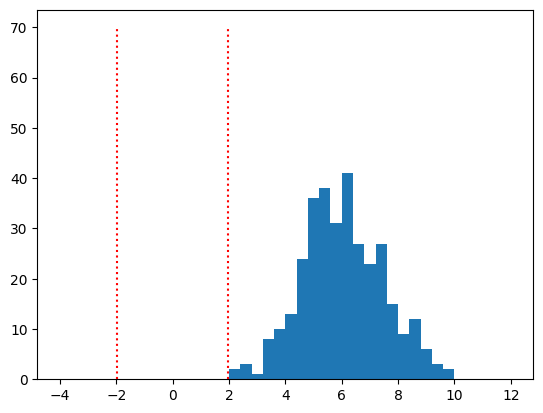

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dm_list, bins=40, range=(-4,12))
plt.vlines(-1.96, 0,70,color='r', linestyle='dotted')
plt.vlines(1.96, 0,70,color='r', linestyle='dotted')
plt.plot()

In [ ]:
dm_list = []

for k in range(331):
    # W1
    w2_list = W2_fcst[:,k].tolist()

    #sarW
    sar_list = W_sar_fcst[:,k].tolist()

    actual = torch.from_numpy(y_data[-816:, k]).float().tolist()
    rt = dm_test(actual, w2_list, sar_list, h=1, crit="MSE")

    dm_list.append(rt.DM)

In [ ]:
n = 0
m = 0
for d in dm_list:
    if d > 1.65:
        m += 1
    if d >1.96:
        n += 1
print('5% significant ratio:\t', m/len(dm_list))
print('2.5% significant ratio:\t', n/len(dm_list))

5% significant ratio:	 0.9033232628398792
2.5% significant ratio:	 0.8851963746223565


In [ ]:
print('average value of DM statistics:\t', sum(dm_list)/len(dm_list))

average value of DM statistics:	 3.5566271682018926


[]

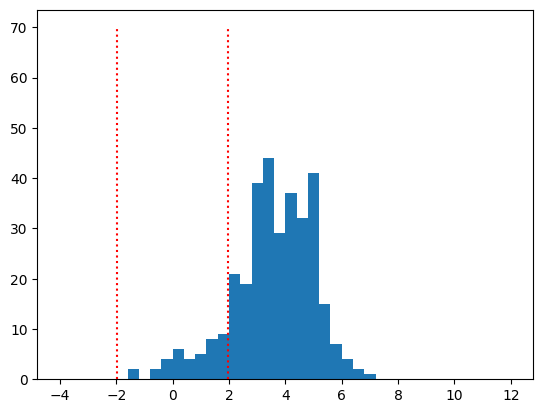

In [ ]:
plt.hist(dm_list, bins=40, range=(-4,12))
plt.vlines(-1.96, 0,70,color='r', linestyle='dotted')
plt.vlines(1.96, 0,70,color='r', linestyle='dotted')
plt.plot()

In [ ]:
dm_list = []

for k in range(331):
    # W1
    w1_list = W1_fcst[:,k].tolist()

    #deepW
    deep_list = W_deep_fcst[:,k].tolist()

    actual = torch.from_numpy(y_data[-816:, k]).float().tolist()
    rt = dm_test(actual, w1_list, deep_list, h=1, crit="MSE")

    dm_list.append(rt.DM)

In [ ]:
n = 0
m = 0
for d in dm_list:
    if d > 1.65:
        m += 1
    if d >1.96:
        n += 1
print('5% significant ratio:\t', m/len(dm_list))
print('2.5% significant ratio:\t', n/len(dm_list))

5% significant ratio:	 1.0
2.5% significant ratio:	 1.0


In [ ]:
print('average value of DM statistics:\t', sum(dm_list)/len(dm_list))

average value of DM statistics:	 6.181743333071918


[]

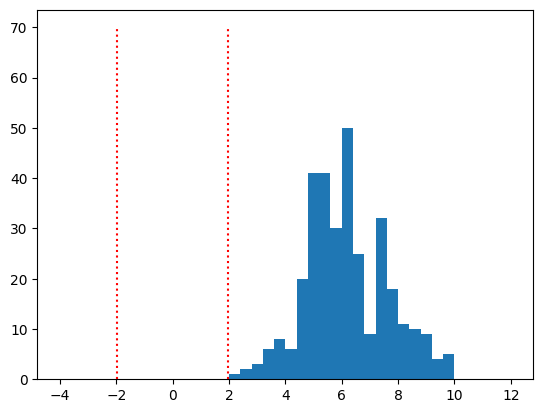

In [ ]:
plt.hist(dm_list, bins=40, range=(-4,12))
plt.vlines(-1.96, 0,70,color='r', linestyle='dotted')
plt.vlines(1.96, 0,70,color='r', linestyle='dotted')
plt.plot()

In [ ]:
dm_list = []

for k in range(331):
    # W1
    w2_list = W2_fcst[:,k].tolist()

    #deepW
    deep_list = W_deep_fcst[:,k].tolist()

    actual = torch.from_numpy(y_data[-816:, k]).float().tolist()
    rt = dm_test(actual, w2_list, deep_list, h=1, crit="MSE")

    dm_list.append(rt.DM)

In [ ]:
n = 0
m = 0
for d in dm_list:
    if d > 1.65:
        m += 1
    if d >1.96:
        n += 1
print('5% significant ratio:\t', m/len(dm_list))
print('2.5% significant ratio:\t', n/len(dm_list))

5% significant ratio:	 0.9244712990936556
2.5% significant ratio:	 0.8972809667673716


In [ ]:
print('average value of DM statistics:\t', sum(dm_list)/len(dm_list))

average value of DM statistics:	 3.8633622049344427


[]

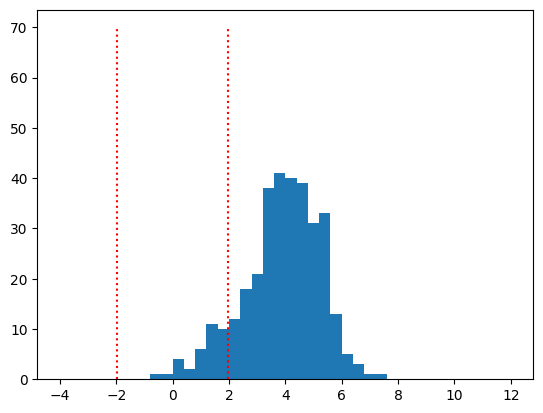

In [ ]:
plt.hist(dm_list, bins=40, range=(-4,12))
plt.vlines(-1.96, 0,70,color='r', linestyle='dotted')
plt.vlines(1.96, 0,70,color='r', linestyle='dotted')
plt.plot()

In [ ]:
n = 0
for dm in dm_list:
    if dm < -1.96:
        n+=1
print(n)

0
